# Comenzamos cargando el set de datos y creando el data frame de pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar el dataset
df = pd.read_csv('personas.csv')
df

ParserError: Error tokenizing data. C error: Expected 1 fields in line 106331, saw 2


# Al cargar el archivo con nuestro set de datos encontramos un error en el delimitador de la linea 106331 por lo que procedemos a corregirlo al cargar el archivo

In [ ]:
df = pd.read_csv('personas.csv', header=None, delimiter=';')
df

<ipython-input-3-919e799ab19a>:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('personas.csv', header=None, delimiter=';')


,0,1,2,3,4,5
0,persona_id,nombre,apellido,sexo_id,edad,cvar_ultimo_acceso
1,1,JUAN PABLO,SOTO,2,44,2017/11/29
2,2,SILVINA,GONZALEZ,1,36,2012/02/06
3,3,DIEGO FERNANDO,ASENSIO,2,46,2018/09/20
4,4,MARÍA VICTORIA,TIGNINO,1,37,2019/04/24
...,...,...,...,...,...,...
185614,185613,CINTIA AYELEN,MARTÍNEZ,1.0,30.0,2019/07/10
185615,185614,SOPHIA,HEREDIA,1.0,29.0,2019/07/09
185616,185615,IVANNA FIORELLA,GIGLIESI,1.0,27.0,2019/07/09
185617,185616,MARIA,CERROTTA,1.0,22.0,2019/07/12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185619 entries, 0 to 185618
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       185619 non-null  object
 1   1       183412 non-null  object
 2   2       182286 non-null  object
 3   3       128421 non-null  object
 4   4       128421 non-null  object
 5   5       128331 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


# Limpiamos el data frame

In [ ]:
df = df.drop(columns=[0, 5])
df

,1,2,3,4
0,nombre,apellido,sexo_id,edad
1,JUAN PABLO,SOTO,2,44
2,SILVINA,GONZALEZ,1,36
3,DIEGO FERNANDO,ASENSIO,2,46
4,MARÍA VICTORIA,TIGNINO,1,37
...,...,...,...,...
185614,CINTIA AYELEN,MARTÍNEZ,1.0,30.0
185615,SOPHIA,HEREDIA,1.0,29.0
185616,IVANNA FIORELLA,GIGLIESI,1.0,27.0
185617,MARIA,CERROTTA,1.0,22.0


In [ ]:
df.columns

Index([1, 2, 3, 4], dtype='int64')

In [ ]:
df[3] = pd.to_numeric(df[3], errors='coerce')
df[4] = pd.to_numeric(df[4], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185619 entries, 0 to 185618
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   1       183412 non-null  object 
 1   2       182286 non-null  object 
 2   3       128420 non-null  float64
 3   4       128420 non-null  float64
dtypes: float64(2), object(2)
memory usage: 5.7+ MB


In [ ]:
df_orig=df.copy()

# Visualizamos los datos con un par de graficos que nos ayudaran a observar la mayor concnetracion y frecuencia en las edades, concideradas en forma conjunta (Mujeres y Hombres)

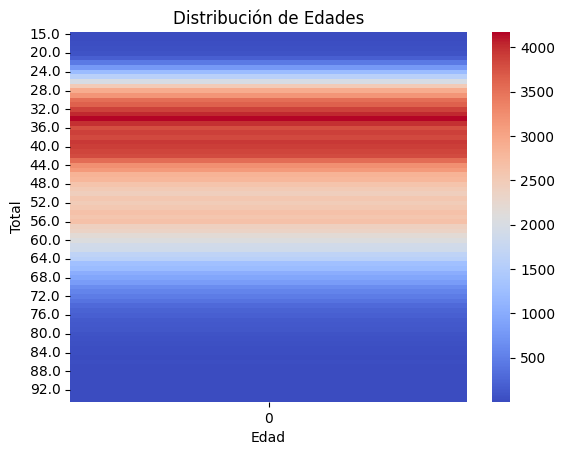

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una tabla de frecuencia para Edad y Sexo, sumando ambos sexos
heatmap_data = df.groupby(4).size()

# Crear el gráfico de calor sin anotaciones
sns.heatmap(heatmap_data.to_frame(), annot=False, cmap="coolwarm")
plt.xlabel("Edad")
plt.ylabel("Total")
plt.title("Distribución de Edades")
plt.show()

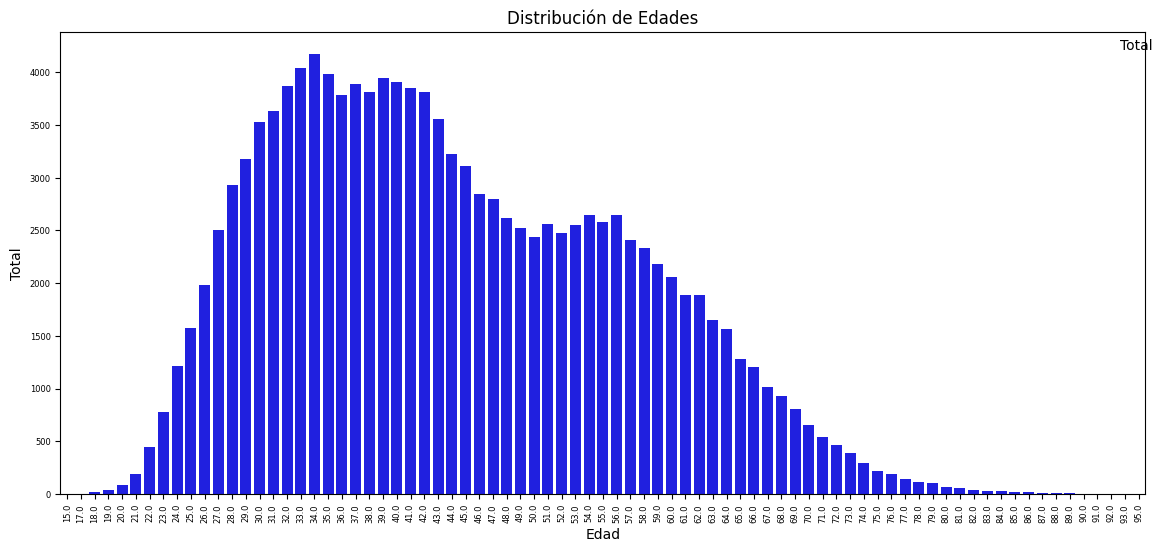

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una tabla de frecuencia para Edad y Sexo, sumando ambos sexos
heatmap_data = df.groupby(4).size()
plt.figure(figsize=(14, 6))

# Crear el gráfico de barras
sns.barplot(x=heatmap_data.index, y=heatmap_data.values, color="blue")

# Agregar "Total" como una etiqueta a la derecha del gráfico
plt.text(len(heatmap_data.index), heatmap_data.max() + 10, "Total", ha="right", va="bottom")

plt.tick_params(axis='both', which='major', labelsize=6)
# Ajustar la etiqueta del eje x (rotación)
plt.xticks(rotation=90)  # Rotamos las etiquetas 45 grados

# Ajustar la etiqueta del eje x
plt.xlabel("Edad")
plt.ylabel("Total")
plt.title("Distribución de Edades")
plt.show()

# Ahora desagregamos visualmente los datos por sexo

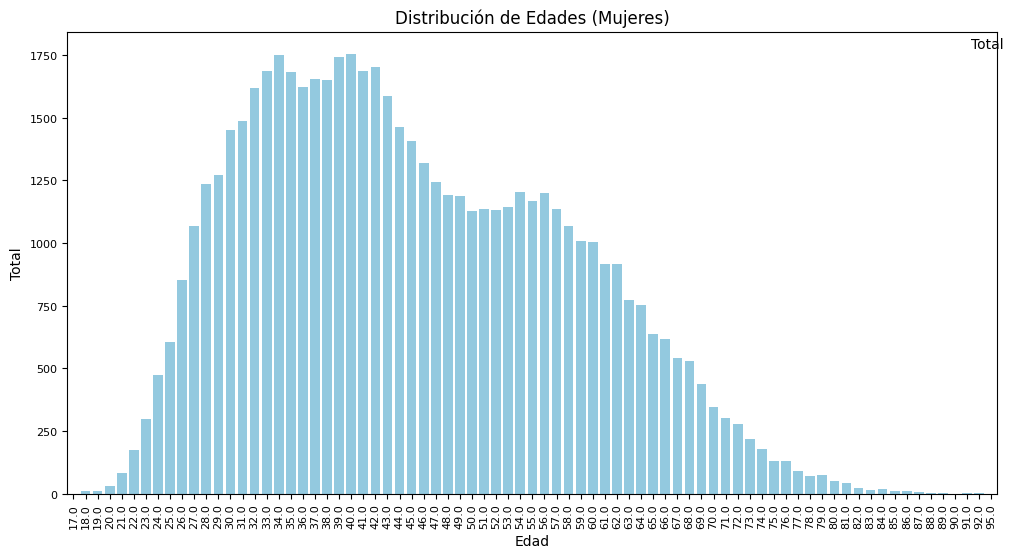

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtra el DataFrame para obtener solo las mujeres
df_mujeres = df_orig[df_orig[3] == 2]

# Crear una tabla de frecuencia para Edad, sumando solo las mujeres
heatmap_data = df_mujeres.groupby(4).size()

# Ajustar el tamaño de la figura (en pulgadas)
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras
sns.barplot(x=heatmap_data.index, y=heatmap_data.values, color="skyblue")

# Agregar "Total" como una etiqueta a la derecha del gráfico
plt.text(len(heatmap_data.index), heatmap_data.max() + 10, "Total", ha="right", va="bottom")

# Ajustar la etiqueta del eje x (rotación)
plt.xticks(rotation=90)

# Reducir el tamaño de la tipografía
plt.tick_params(axis='both', which='major', labelsize=8)

# Ajustar la etiqueta del eje x
plt.xlabel("Edad")
plt.ylabel("Total")
plt.title("Distribución de Edades (Mujeres)")
plt.show()

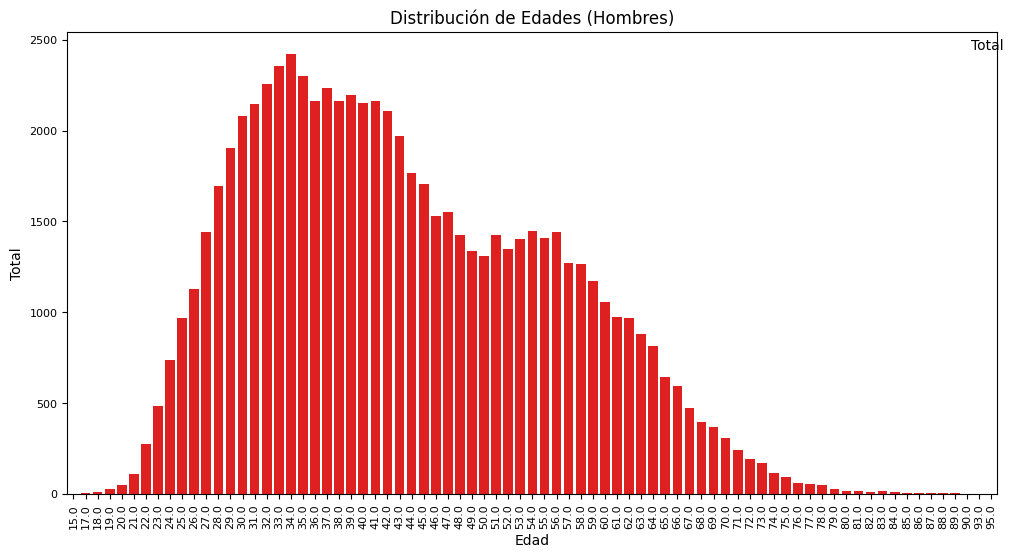

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtra el DataFrame para obtener solo las mujeres
df_hombres = df_orig[df_orig[3] == 1]

# Crear una tabla de frecuencia para Edad, sumando solo las mujeres
heatmap_data = df_hombres.groupby(4).size()

# Ajustar el tamaño de la figura (en pulgadas)
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras
sns.barplot(x=heatmap_data.index, y=heatmap_data.values, color="red")

# Agregar "Total" como una etiqueta a la derecha del gráfico
plt.text(len(heatmap_data.index), heatmap_data.max() + 10, "Total", ha="right", va="bottom")

# Ajustar la etiqueta del eje x (rotación)
plt.xticks(rotation=90)

# Reducir el tamaño de la tipografía
plt.tick_params(axis='both', which='major', labelsize=8)

# Ajustar la etiqueta del eje x
plt.xlabel("Edad")
plt.ylabel("Total")
plt.title("Distribución de Edades (Hombres)")
plt.show()

# Como conclusion podemos extraer que las edades más comunes que presentan los investigadores del CONICET son las de 34, 39 y 40 años en mujeres y de 33, 34 y 35 años en hombres.